In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files

In [ ]:
def Metropolis(m, f, g, sigm):
    k = 0
    x = np.zeros(m)
    u = np.random.rand(m)
    x[0] = g.rvs(0, scale=sigm)

    for i in range(1, m):
        xt = x[i-1]
        y = g.rvs(loc=xt, scale=sigm)
        num = f.pdf(y) * g.pdf(xt, loc=y, scale=sigm)
        den = f.pdf(xt) * g.pdf(y, loc=xt, scale=sigm)                       
        if u[i] <= min(1,num / den):
            x[i] = y
        else:
            x[i] = xt
            k += 1
    print('reject probablity: ' + str(k / m))

    return  x
m = 10000
f = st.norm
g = st.norm
start = datetime.datetime.now()
x = Metropolis(m, f, g, 1)
print(datetime.datetime.now()-start)

reject probablity: 0.3069
0:00:06.977269


In [ ]:
np.var(x)

1.0416107076470242

[-0.66505031  0.43665096  0.43665096 ...  0.90207175  0.73010036
  0.73010036]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

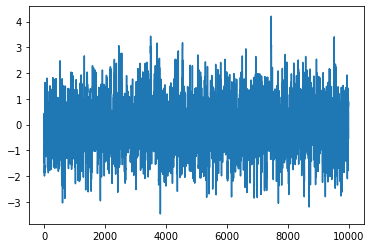

In [ ]:
print(x)

plt.plot(np.arange(1,m+1),x)
plt.savefig("MH_traj_norm.png")
files.download("MH_traj_norm.png") 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

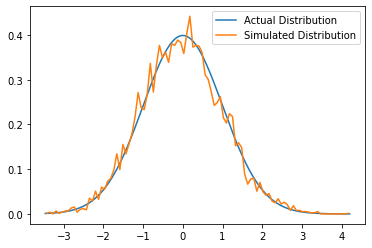

In [ ]:
tick = np.arange(x.min(), x.max(), 0.001)
plt.plot(tick, f.pdf(tick),label='Actual Distribution')
p, y = np.histogram(x, bins=100,normed='true')
y = (y[:-1] + y[1:])/2
plt.plot(y, p,label='Simulated Distribution') 
plt.legend()
plt.savefig("Distribution_compare.png")
files.download("Distribution_compare.png") 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


[ 1.          0.77446384  0.59651521  0.46083697  0.35868287  0.27811739
  0.20967002  0.16390971  0.12615433  0.09603194  0.07559153  0.05434374
  0.03139447  0.01111631 -0.00731354 -0.0197573  -0.02434446 -0.02352007
 -0.02441625 -0.02801802 -0.03296006 -0.03379947 -0.02939439 -0.02784621
 -0.01762476 -0.00972893  0.00274498  0.01543581  0.01392647  0.01454945
  0.02600041  0.03325737  0.03204186  0.03444628  0.03955473  0.0437498
  0.04695477  0.05009648  0.0514165   0.05223774  0.05260199]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

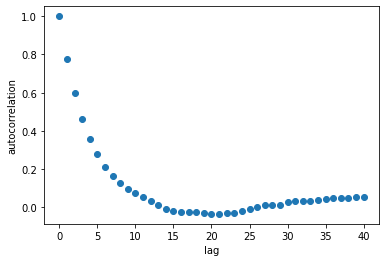

In [ ]:
t = sm.tsa.acf(x)
print(t)
l = np.arange(len(t))
plt.scatter(l,t)
plt.xlabel('lag')
plt.ylabel('autocorrelation')
plt.legend
plt.savefig("Autocorelation2.png")
files.download("Autocorelation2.png") 
plt.show()

193433
156055
650512
0:12:09.374373


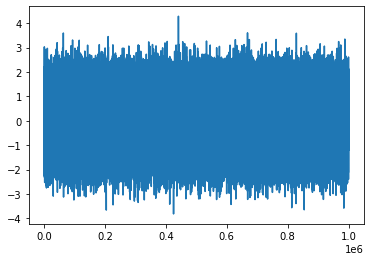

In [3]:
###### algorithm 1
def algorithm1(m, f, g, sigm):  # f target / g proposal 
    k = 0          #
    x = np.zeros(m)  
    u = np.random.rand(m)   #
    v = np.random.rand(m)   #
    x[0] = g.rvs(0, scale=sigm) # pick an initial value of the walk 
    j = 0      ### reject in step 2

    for i in range(1, m):
        xt = x[i-1]  
        y = g.rvs(loc=xt, scale=sigm)
        num = f.pdf(y,scale=np.sqrt(2)) * g.pdf(xt, loc=y, scale=sigm)  # where the np.sqrt(2) is f*
        den = f.pdf(xt,scale=np.sqrt(2)) * g.pdf(y, loc=xt, scale=sigm)  
        #print(num/den)      
        g2 = min(1,num / den)   # step2 of the alorightm
        if u[i] > g2:           # if not pass step2, no more calcu, x_t+1 = x_t
            x[i] = xt
            j += 1
        else:
            num = f.pdf(y) * g2 * g.pdf(xt, loc=y, scale=sigm)    
            den = f.pdf(xt) * g2 * g.pdf(y, loc=xt, scale=sigm) 
            rol = min(1,num/den)   # step 3, acceptance rate
            #print(num/den)
            if v[i] <= rol:      # if pass the step 3
                x[i] = y
            else: 
                x[i] = xt        # reject 
                k += 1          #reject in step 3
        
    #print('reject probablity: ' + str(k / m))
    print(j)
    print(k)
    print(m-j-k)
    return  x
m = 1000000
f = st.norm
g = st.norm
start = datetime.datetime.now()
x2 = algorithm1(m, f, g, 1)
print(datetime.datetime.now()-start)
plt.plot(np.arange(1,m+1),x2)
#plt.savefig("A1_traj_norm.png")
#files.download("A1_traj_norm.png") 
plt.show()


# the reject rate is lower, but the result is not so good... i have no idea about it

In [ ]:
np.var(x2)

0.6222458294610834

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

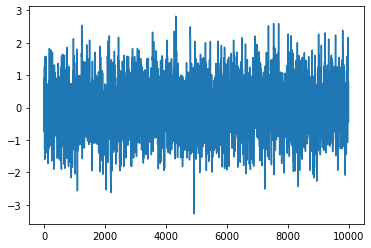

In [ ]:
plt.plot(np.arange(1,m+1),x2)
plt.savefig("MH_traj_norm.png")
files.download("MH_traj_norm.png") 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


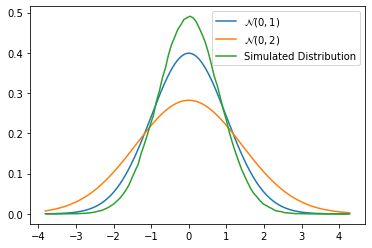

In [5]:
tick = np.arange(x2.min(), x2.max(), 0.001)
plt.plot(tick, f.pdf(tick),label='$\mathcal{N}(0,1)$')
plt.plot(tick, f.pdf(tick,scale=np.sqrt(2)),label='$\mathcal{N}(0,2)$')
p, y = np.histogram(x2, bins=100,normed='true')
y = (y[:-1] + y[1:])/2
plt.plot(y, p,label='Simulated Distribution') 
plt.legend()
#plt.savefig("Distribution_compare2.png")
#files.download("Distribution_compare2.png") 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


[ 1.          0.72053754  0.51732501  0.37351672  0.27929763  0.20652222
  0.15846381  0.1200389   0.09451782  0.07085075  0.05900687  0.06197234
  0.06229936  0.06213242  0.06244439  0.05116027  0.03708056  0.03152862
  0.02447364  0.02831921  0.03555149  0.03689093  0.03452264  0.03586272
  0.02737524  0.02752821  0.02862267  0.02638628  0.02105964  0.00984684
  0.00268348  0.00422079  0.01411409  0.01143785  0.0100525   0.00454491
 -0.00221433 -0.0157039  -0.02364759 -0.01455528 -0.01169144]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

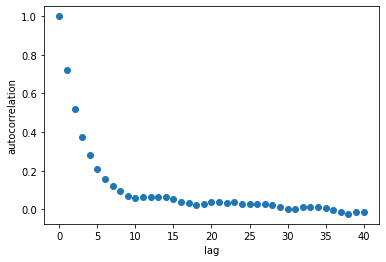

In [ ]:
t = sm.tsa.acf(x2)
print(t)
l = np.arange(len(t))
plt.scatter(l,t)
plt.xlabel('lag')
plt.ylabel('autocorrelation')
plt.legend
plt.savefig("Autocorelation.png")
files.download("Autocorelation.png") 
plt.show()

In [ ]:
x6 = algorithm1(m, f, g, 1)
x3 = algorithm1(m, f, g, 1)
x4 = algorithm1(m, f, g, 1)
x5 = algorithm1(m, f, g, 1)

1870
1604
6526
1961
1511
6528
1864
1590
6546
1961
1566
6473


In [ ]:
D= 1000
J =5
L =9000
x2 = x2[D:]
x3 = x3[D:]
x4 = x4[D:]
x5 = x5[D:]
x6 = x6[D:]   # discard 1st 1000 values

x_2 = np.mean(x2)
x_3 = np.mean(x3)
x_4 = np.mean(x4)
x_5 = np.mean(x5)
x_6 = np.mean(x6) # for each chain, calcu their mean 
xd = (x_2+x_3+x_4+x_5+x_6)/5  # grand mean 
print(xd)
B = L*((x_2-xd)**2+(x_3-xd)**2+(x_4-xd)**2+(x_5-xd)**2+(x_6-xd)**2)/(J-1)   # between chain variance 
print(B)
s2 = np.std(x2)**2
s3 = np.std(x3)**2
s4 = np.std(x4)**2
s5 = np.std(x5)**2
s6 = np.std(x6)**2     # within chain variance 
print(s2,s3,s4,s5,s6)
W = (s2+s3+s4+s5+s6)/5
R= (L-1)*W/L+B/L
R=R/W
R   #GR stats 
# R is close to 1, so it cv 

-0.012173960940571616
8.725536802377992
0.6781937133873419 0.6485415121559217 0.6856403282948453 0.6857123711736434 0.6460675593478008


1.0013384388480453

In [ ]:
a = 0.6781937133873419+0.6485415121559217+0.6856403282948453+0.6857123711736434+0.6460675593478008
a/5

0.6688310968719107

In [ ]:
np.linspace(0,1,3)

array([0. , 0.5, 1. ])

In [ ]:
def finite(kappa,h):   #dem=9
  dem = int(1/h - 1)
  b = np.linspace(0,1,int(1/h)+1)
  b = b[1:]
  b.pop()
  A = np.zeros((dem,dem))
  a = np.linspace(0,1,len(kappa)+1)
  A[0,0] = -(4+2*kappa[0]/(h**2))
  A[0,1] = kappa[0]/(h**2)
  A[-1,-1] = -(4+2*kappa[-1]/(h**2))
  A[-1,-2] = kappa[-1]/(h**2)
  t = 0
  for i in range(1,dem-1):
    if i*h >= a[t] and i*h < a[t+1]:
      A[i,i] = -(4+2*kappa[t]/(h**2))
      A[i,i-1] = kappa[t]/(h**2) 
      A[i,i+1] = kappa[t]/(h**2) 
    else:
      t += 1
      A[i,i] = -(4+2*kappa[t]/(h**2))
      A[i,i-1] = kappa[t]/(h**2) 
      A[i,i+1] = kappa[t]/(h**2)
  ans = np.linalg.inv(A)@b
  x = []
  for i in range(len(ans)):
    if i*h in a:
      x.append(ans[i])
  return np.array(x)




In [ ]:
def multilognorm(x):
  ans = 1
  for i in range(len(x)):
    ans *= np.exp(-np.log(x[i])**2/2)/(x[i]*np.sqrt(2*np.pi))
  return ans

def norm(x):
  ans = 1 
  for i in range(len(x)):
    ans *= np.exp(-(x[i])**2/2)/np.sqrt(2*np.pi)
  return ans


In [ ]:
def MH(m,d,h):
  x = np.zeros((m,d))
  k = 0
  x[0] = np.random.normal(0,1,d)
  e = np.random.lognormal(0,1,d)
  print(e)
  data = finite(e,h) 
 
  for j in range(1,m):
    xt = x[j-1]
    y = xt+np.random.normal(0,0.06,d)
    s = np.random.rand(1)
    u = finite(np.exp(xt),h)
  
    v = finite(np.exp(y),h)

    #r = multilognorm(np.exp(y))*np.exp((-np.linalg.norm(data-v))**2/2*10*(-5))/(multilognorm(np.exp(xt))*np.exp((-np.linalg.norm(data-u))**2/2*10*(-5)))
    ratio = np.log(multilognorm(np.exp(y)))-np.log(multilognorm(np.exp(xt)))+((np.linalg.norm(data-u))**2)/(2*10**(-5))-((np.linalg.norm(data-v))**2)/(2*10**(-5))
                                # multilognorm is a function that I write to calcu the value of prior
                             
    
    if s <= min(1,np.exp(ratio)):
      x[j] = y
    else:
      x[j] = xt
      k+=1
  print('reject probablity: ' + str(k / m))
  x = np.exp(x)
  
  return x

In [ ]:
start = datetime.datetime.now()
x2 = MH(1000000,2,0.1)
print(datetime.datetime.now()-start)

[0.98308889 0.08663596]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


reject probablity: 0.713233
0:08:50.878170


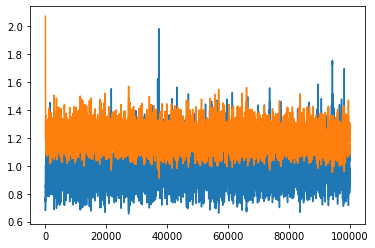

In [ ]:
plt.plot(np.arange(1,100000+1),x2)

In [ ]:
x_mean = np.mean(x2,axis = 0)
x_mean

array([0.99594921, 0.08739862])

In [ ]:
t0 = sm.tsa.acf(x2[:,0])
t1 = sm.tsa.acf(x2[:,1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [ ]:
print(t0)
print(t1)

[1.         0.99822825 0.99646383 0.99470838 0.99295425 0.99119882
 0.98942831 0.98766362 0.98589915 0.98413862 0.98238235 0.98063026
 0.97887303 0.97710739 0.97536272 0.97360222 0.97183825 0.97006535
 0.96829826 0.96653712 0.96478269 0.96301801 0.96124686 0.95947392
 0.95769084 0.95591298 0.95414705 0.95238075 0.95062251 0.94886228
 0.94709751 0.94534202 0.94358127 0.9418279  0.94007761 0.93832488
 0.93656948 0.93482618 0.93309753 0.93137689 0.92966937]
[1.         0.89208868 0.81749652 0.76507526 0.72738054 0.70108933
 0.68170903 0.66664475 0.65447467 0.64441976 0.63641242 0.62902726
 0.62347239 0.61880586 0.614609   0.61069468 0.60709366 0.60349974
 0.59998433 0.59593586 0.59201324 0.58799631 0.58372725 0.5800933
 0.57651176 0.57337186 0.57015125 0.56679218 0.56347191 0.55986959
 0.55704379 0.554369   0.55163604 0.54948148 0.54728721 0.54537112
 0.54364799 0.54175218 0.5399032  0.53787655 0.53567546]


In [ ]:
#### gelman-rubin
x6 = MH(1000000,2,0.01)
x3 = MH(1000000,2,0.01)
x4 = MH(1000000,2,0.01)
x5 = MH(1000000,2,0.01)
D= 100000
J =5
L =1000000-10000
x2 = x2[D:]
x3 = x3[D:]
x4 = x4[D:]
x5 = x5[D:]
x6 = x6[D:]   # discard 1st 1000 values
x_2 = np.mean(x2)
x_3 = np.mean(x3)
x_4 = np.mean(x4)
x_5 = np.mean(x5)
x_6 = np.mean(x6) # for each chain, calcu their mean 
xd = (x_2+x_3+x_4+x_5+x_6)/5  # grand mean 

B = L*((x_2-xd)**2+(x_3-xd)**2+(x_4-xd)**2+(x_5-xd)**2+(x_6-xd)**2)/(J-1)   # between chain variance 

s2 = np.std(x2)**2
s3 = np.std(x3)**2
s4 = np.std(x4)**2
s5 = np.std(x5)**2
s6 = np.std(x6)**2     # within chain variance 

W = (s2+s3+s4+s5+s6)/5
print(W)
R= (L-1)*W/L+B/L
R=R/W
R   #GR stats 

[3.16654217 0.84381089]


In [ ]:
l = np.arange(len(t0))
plt.scatter(l,t0)
plt.xlabel('lag')
plt.ylabel('autocorrelation')
plt.title('1st dem of 2-dem')


In [ ]:

plt.scatter(l,t1)
plt.xlabel('lag')
plt.ylabel('autocorrelation')
plt.title('2nd dem of 2-dem')


In [ ]:
def algo1(m,d,h1,h2):
  x = np.zeros((m,d))
  k = 0  # 第1部拒绝
  k2 = 0  #第2步拒绝
  k3 = 0   # 接受
  x[0] = np.array([0,0])
  e = np.random.lognormal(0,1,d)
  print(e)
  data = finite(e,h2) #####
  for j in range(1,m):
    xt = x[j-1]
    y = xt+np.random.normal(0,0.03,d)
    s = np.random.rand(1)
    u1 = finite(np.exp(xt),h1)
    v1 = finite(np.exp(y),h1)
    ratio = np.log(multilognorm(np.exp(y)))-np.log(multilognorm(np.exp(xt)))+((np.linalg.norm(data-u1))**2)/(2*10**(-5))-((np.linalg.norm(data-v1))**2)/(2*10**(-5))
    if s >= min(1,np.exp(ratio)):
      x[j] = xt
      k += 1
    else:
      u2 = finite(np.exp(xt),h2)
      v2 = finite(np.exp(y),h2)
      ratio2 = np.log(multilognorm(np.exp(y)))-np.log(multilognorm(np.exp(xt)))+((np.linalg.norm(data-u2))**2)/(2*10**(-5))-((np.linalg.norm(data-v2))**2)/(2*10**(-5))
      #print(u1,u2)
      #print(v1,v2)
      #ss = np.random.rand(1)
      if s >= min(1,np.exp(ratio2)):
        x[j] = xt
        k2 += 1
      else:
        x[j] = y
        k3 += 1
  print(k/m)
  print(k2/m)
  print(k3/m)
  x = np.exp(x)
  return x

In [ ]:
start = datetime.datetime.now()
x = algo1(1000,2,0.005,0.001)
print(datetime.datetime.now()-start)



[2.28145427 0.9760174 ]
0.408
0.272
0.319
0:02:41.298832


In [ ]:
np.mean(x,axis=0)

array([0.65828176, 0.64008084])

In [ ]:
#for i in range(len(x[0])):
  #print(sm.tsa.acf(x[:,i]))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '1st dem of 2-dem')

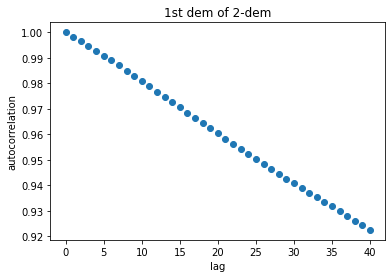

In [ ]:
t0 = sm.tsa.acf(x[:,0])
t1 = sm.tsa.acf(x[:,1])
l = np.arange(len(t0))
plt.scatter(l,t0)
plt.xlabel('lag')
plt.ylabel('autocorrelation')
plt.title('1st dem of 2-dem')

Text(0.5, 1.0, '1st dem of 2-dem')

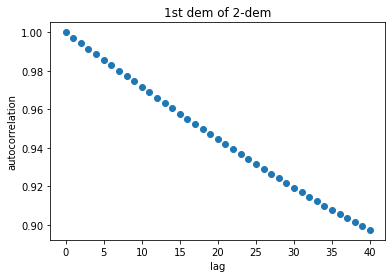

In [ ]:
l = np.arange(len(t1))
plt.scatter(l,t1)
plt.xlabel('lag')
plt.ylabel('autocorrelation')
plt.title('1st dem of 2-dem')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


(0.0, 4.0)

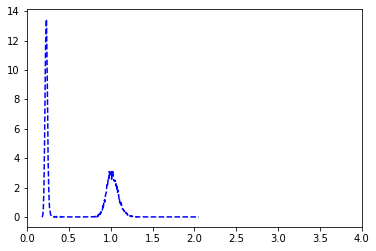

In [ ]:
tick = np.arange(x[:,0].min(), x[:,0].max(), 0.001)
p, y = np.histogram(x, bins=500, normed=True)
y = (y[:-1] + y[1:])/2
plt.plot(y, p, '--b')
plt.xlim(0,4)